In [1]:

import pandas as pd
import yfinance as yf
import fredapi as fa
from datetime import date, timedelta
#from Compare_Sectors import CompareSectors
from Sector_Exposure import CompareSectors
import numpy as np
#from sklearn.linear_model import LinearRegression

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')

In [2]:


def update_data(compare_group = None, rate_comp = None):
    
    assert compare_group, rate_comp
    
    sector_names = ['Materials', 'Industrials', 'Consumer Discretionary', 
                        'Consumer Staples', 'Health Care',
                        'Financials', 'Information Technology', 
                        'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', "Aerospace", 
                        "Real Yield", "Yield Curve", "10-Year", "2-Year", "SP-500"]
    
    
    sec = yf.download([f"^SP500-{i}" for i in range(15,65,5)], start = '2010-01-04', progress=False)["Close"]

    # DGS10
    sec['Energy'] = yf.download(["^GSPE"], start = '2010-01-04', progress=False)["Close"]
    sec['Semiconductors'] = yf.download(["SOXX"], start = '2010-01-04', progress=False)["Close"]
    sec['Aerospace'] = yf.download(["ITA"], start = '2010-01-04', progress=False)["Close"]
    sec['Real Yield'] = fred.get_series('DFII10', observation_start = '2010-01-04', end = date.today())
    sec['Yield Curve'] = fred.get_series('T10Y2Y', observation_start = '2010-01-04', end = date.today())
    sec['10-Year'] = fred.get_series('DGS10', observation_start = '2010-01-04', end = date.today())
    sec['2-Year'] = fred.get_series('DGS2', observation_start = '2010-01-04', end = date.today())
    sec['SP-500'] = yf.download("^GSPC", start = '2010-01-04', progress=False)["Close"]
    
    if 'sector' in compare_group.lower():
        sec.columns = sector_names
    #elif 'factor' in compare_group.lower():
    
    if 'real' in rate_comp.lower():
        # , 'SP-500'
        return sec.drop(columns = ['Yield Curve', '10-Year', '2-Year']).dropna()
    else:
        return sec.dropna()



In [8]:


real_rate_df = update_data('sectors', 'real rate')



In [9]:


c = CompareSectors(real_rate_df, 252, 30)



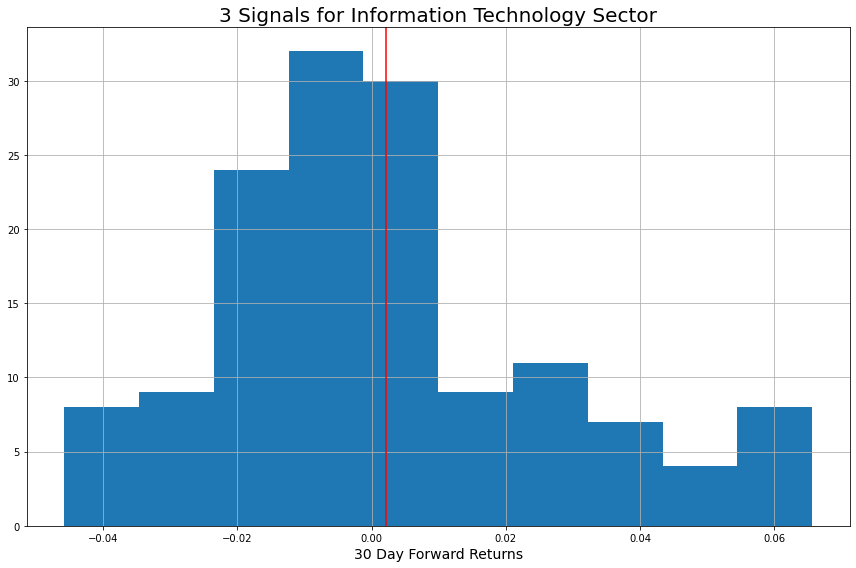

In [7]:


c.show_return_distribution('Information Technology', 3)



In [40]:


def beta(consider, against):
    
    



,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
2012-01-09,0.016970,0.005848,0.005313,-0.045778,-0.036787,0.023498,0.049510,-0.041356,-0.066039,-0.007155,-0.003714,0.051362,0.017029
2012-01-10,0.003089,-0.000604,0.009413,-0.041227,-0.042685,0.015436,0.055498,-0.037103,-0.066773,-0.005252,-0.003741,0.047085,0.004800
2012-01-11,-0.008787,-0.006128,0.006167,-0.033057,-0.038983,0.002170,0.057666,-0.047821,-0.059100,-0.013954,0.014213,0.038448,0.006026
2012-01-12,-0.022502,-0.015271,0.006670,-0.032607,-0.040367,0.004512,0.055806,-0.047838,-0.058293,-0.008902,0.019912,0.029067,-0.003262
2012-01-13,-0.016179,-0.017806,0.012578,-0.034649,-0.037088,0.011516,0.067548,-0.047173,-0.066605,-0.026778,0.019861,0.060640,-0.004776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-30,0.022109,0.024532,0.017418,-0.067583,-0.035148,0.043347,0.053053,-0.094284,-0.109831,-0.018498,-0.020646,0.089085,0.021079
2012-01-03,0.012983,0.009745,0.022539,-0.051903,-0.027812,0.027605,0.048572,-0.079332,-0.076076,-0.004246,-0.027459,0.102724,0.017068
2012-01-04,0.013136,0.002564,0.008989,-0.050106,-0.027057,0.037112,0.051957,-0.076603,-0.070199,0.007582,-0.029259,0.120315,0.012668
2012-01-05,0.011598,0.008447,0.014367,-0.047438,-0.032093,0.031241,0.047165,-0.064139,-0.073637,0.003526,-0.017189,0.094224,0.022777


In [8]:

mat = c.get_sector_forward_return(c.scores, "Materials")

AttributeError: 'CompareSectors' object has no attribute 'get_sector_forward_return'

In [21]:


yuh['Materials'] == mat['30-Day Forward Return']




2012-01-09    True
2012-01-10    True
2012-01-11    True
2012-01-12    True
2012-01-13    True
              ... 
2022-04-07    True
2022-04-08    True
2022-04-11    True
2022-04-12    True
2022-04-13    True
Length: 2437, dtype: bool

In [7]:

# .drop(columns = ['SP-500'])
c = CompareSectors(cool, 252*2, 30)

rets = c.get_return_means()




['Materials', 'Industrials', 'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology', 'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', 'Aerospace']
Materials
Industrials
Consumer Discretionary
Consumer Staples
Health Care
Financials
Information Technology
Telecommunication Services
Utilities
Real Estate
Energy
Semiconductors
Aerospace


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-5,0.000617,-0.030278,0.037210,-0.030313,0.001725,-0.037020,0.027196,0.017230,-0.036913,-0.049653,-0.011154,0.034408,-0.049139
-4,0.015785,0.004656,0.004084,0.000982,-0.001610,-0.001997,0.009602,-0.008703,-0.016870,-0.015350,-0.051065,0.027530,-0.017540
-3,-0.002614,-0.004092,0.008682,-0.002052,-0.004110,-0.005038,0.016778,0.000358,-0.023473,-0.022742,-0.050373,0.016872,-0.022844
-2,0.000078,-0.005131,0.003580,-0.007578,-0.001113,0.004697,0.008820,-0.002957,-0.007394,-0.004183,-0.027857,0.022025,-0.008390
-1,-0.001979,0.001682,-0.001101,-0.010535,-0.004486,0.014369,0.007386,-0.007523,-0.018441,-0.009586,0.010230,0.020499,0.007172
0,-0.005030,-0.002615,0.004167,-0.003534,0.005477,0.002719,0.007727,-0.012287,-0.010024,-0.008719,-0.005225,0.009708,0.005941
1,-0.006908,0.000436,0.006225,-0.000484,0.004490,-0.007563,0.005541,-0.005057,0.003821,-0.000555,-0.005824,0.000128,0.006095
2,-0.006246,-0.000188,0.000731,0.000422,0.005234,-0.012030,0.008704,-0.011417,0.017655,0.010462,-0.006029,0.003556,0.008820
3,-0.005670,-0.007613,-0.000279,0.010308,0.011246,-0.009736,0.002744,-0.006375,0.027451,0.020651,-0.015335,0.008562,0.002098
4,0.005307,0.004287,-0.004293,0.014081,0.015563,-0.006457,-0.009928,-0.026052,0.023247,0.006317,0.023326,0.004056,0.016567


In [51]:


#c.get_sector_forward_return(c.scores, "Materials")['30-Day Forward Return'].plot()


#(-1*(cool['Materials'].diff(-30)/cool['Materials'])).plot()

(cool.iloc[60] / cool.iloc[30]) - 1

Materials                     0.066729
Industrials                   0.102437
Consumer Discretionary        0.096237
Consumer Staples              0.036774
Health Care                   0.023846
Financials                    0.116396
Information Technology        0.066650
Telecommunication Services    0.037410
Utilities                     0.019621
Real Estate                   0.133663
Energy                        0.014165
Semiconductors                0.055306
Aerospace                     0.113164
Real Yield                    0.095890
SP-500                        0.063592
dtype: float64

<BarContainer object of 9 artists>

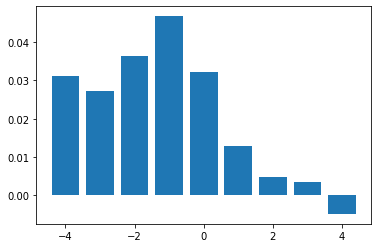

In [65]:
import matplotlib.pyplot as plt

#rets.mean(axis=1)


plt.bar(rets.index, rets['Semiconductors'])



<BarContainer object of 9 artists>

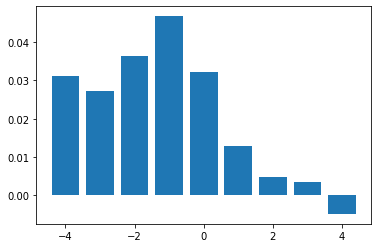

In [77]:


plt.bar(rets.index, rets['Semiconductors'])



In [70]:

semi = c.get_sector_forward_return(c.scores, "Semiconductors")



0.07894736842105263

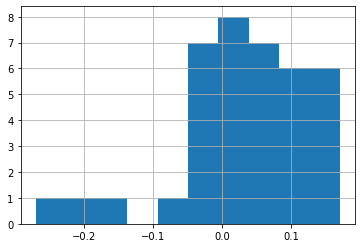

In [80]:



semi['30-Day Forward Return'].loc[semi.Scores == -4].hist()


len(semi['30-Day Forward Return'].loc[semi.Scores == -4])

